<a href="https://colab.research.google.com/github/dineshkumarDK47/Stock-Price-Prediction/blob/main/TATA_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv("/content/drive/MyDrive/archive/NSE-Tata-Global-Beverages-Limited.csv")
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

lstm_model.save("saved_lstm_model.h5")

train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = closing_price

# Plot current chart
plt.subplot(2, 1, 1)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', 'Predictions']])
plt.title('Current Chart')
plt.legend()

# Generate future dates beyond available data
last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=3650, freq='D')  # Generate dates for 10 years (3650 days)

# Scale the input data for future predictions
future_inputs = future_dates[len(future_dates)-len(valid_data)-60:].values
future_inputs = future_inputs.reshape(-1, 1)
future_inputs = scaler.transform(future_inputs)

# Prepare future prediction data
X_future = []
for i in range(60, future_inputs.shape[0]):
    X_future.append(future_inputs[i-60:i, 0])
X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))
future_price = lstm_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)

# Plot future price chart
# Generate future dates beyond available data
last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(valid_data) + len(X_future), freq='D')  # Generate dates for available data and future predictions

# Calculate accuracy
rmse = np.sqrt(mean_squared_error(valid_data["Close"], valid_data["Predictions"]))
accuracy = (1 - rmse / np.mean(valid_data["Close"])) * 100

# Generate recommendation
recommendation = "Buy" if accuracy > 90 else "Do not buy"

# Plot current chart with accuracy and recommendation
plt.subplot(2, 1, 1)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', 'Predictions']])
plt.title('Current Chart')
plt.legend()
plt.text(0.02, 0.9, f'Accuracy: {accuracy:.2f}%\nRecommendation: {recommendation}',
         transform=plt.gca().transAxes)

# Plot future price chart
# Generate future dates beyond available data
last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(valid_data) + len(X_future), freq='D')  # Generate dates for available data and future predictions

# Plot future price chart
plt.subplot(2, 1, 2)
plt.plot(future_dates[len(valid_data):], future_price, label='Future Price')
plt.title('Future Price Chart')
plt.legend()

plt.tight_layout()
plt.show()



FileNotFoundError: ignored

927/927 - 18s - loss: 0.0012 - 18s/epoch - 19ms/step
8/8 [==============================] - 1s 10ms/step


<ipython-input-3-b01c1f596fbc>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = closing_price
<ipython-input-3-b01c1f596fbc>:79: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


8/8 [==============================] - 0s 10ms/step


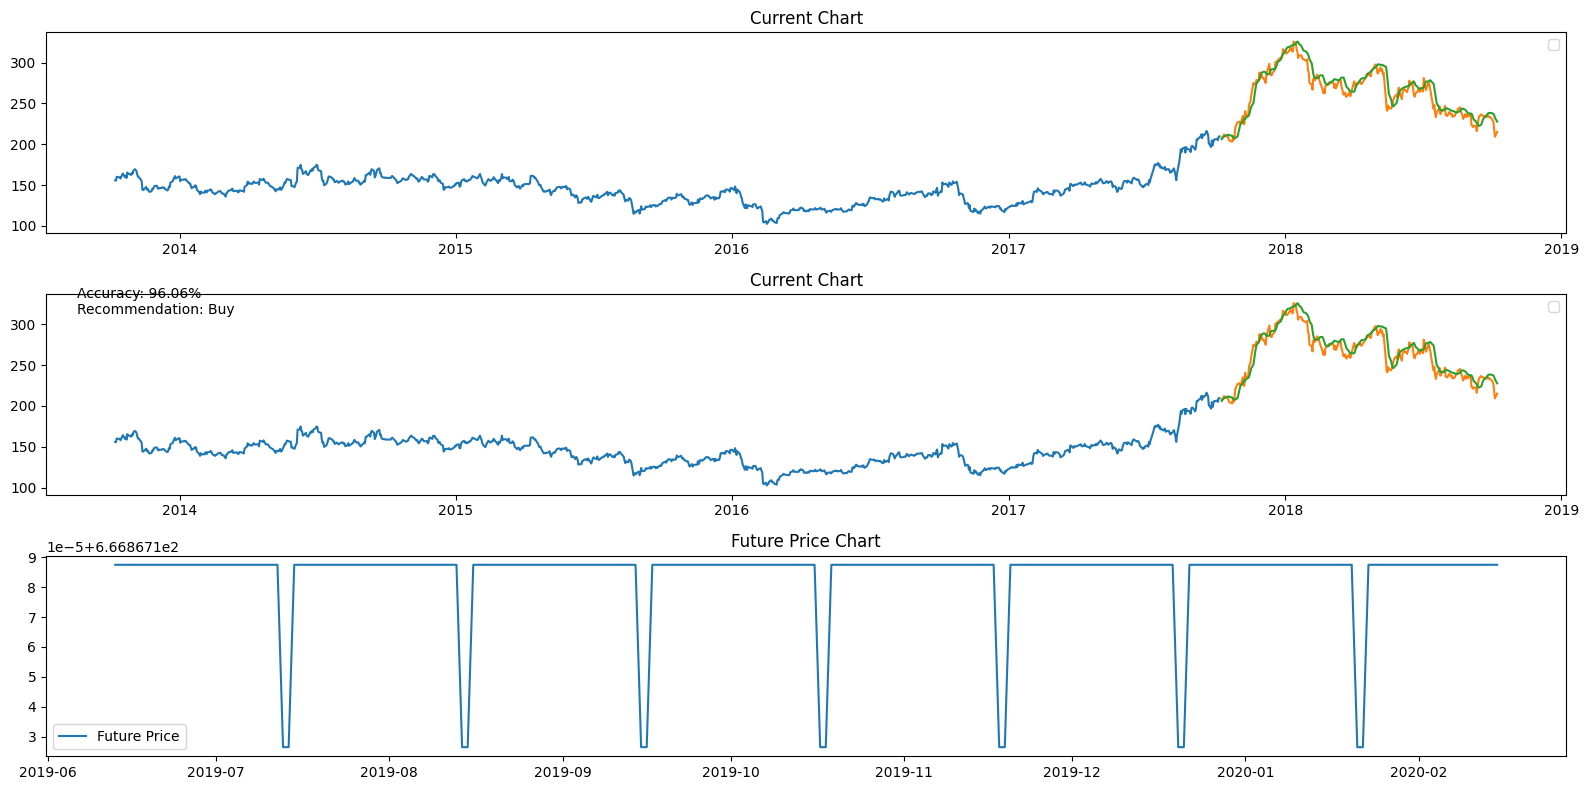

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler = MinMaxScaler(feature_range=(0, 1))

df = pd.read_csv("/content/drive/MyDrive/archive/NSE-Tata-Global-Beverages-Limited.csv")
df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.index = df['Date']

plt.figure(figsize=(16, 8))
plt.plot(df["Close"], label='Close Price history')

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

final_dataset = new_dataset.values

train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

inputs_data = new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

lstm_model.save("saved_lstm_model.h5")

train_data = new_dataset[:987]
valid_data = new_dataset[987:]
valid_data['Predictions'] = closing_price


plt.subplot(3, 1, 1)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', 'Predictions']])
plt.title('Current Chart')
plt.legend()


last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=3650, freq='D')  # Generate dates for 10 years (3650 days)


future_inputs = future_dates[len(future_dates)-len(valid_data)-60:].values
future_inputs = future_inputs.reshape(-1, 1)
future_inputs = scaler.transform(future_inputs)


X_future = []
for i in range(60, future_inputs.shape[0]):
    X_future.append(future_inputs[i-60:i, 0])
X_future = np.array(X_future)

X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))
future_price = lstm_model.predict(X_future)
future_price = scaler.inverse_transform(future_price)



last_date = new_dataset.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(valid_data) + len(X_future), freq='D')  # Generate dates for available data and future predictions


rmse = np.sqrt(mean_squared_error(valid_data["Close"], valid_data["Predictions"]))
accuracy = (1 - rmse / np.mean(valid_data["Close"])) * 100


recommendation = "Buy" if accuracy > 90 else "Do not buy"


plt.subplot(3, 1, 2)
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', 'Predictions']])
plt.title('Current Chart')
plt.legend()
plt.text(0.02, 0.9, f'Accuracy: {accuracy:.2f}%\nRecommendation: {recommendation}',
         transform=plt.gca().transAxes)


plt.subplot(3, 1, 3)
plt.plot(future_dates[len(valid_data):], future_price, label='Future Price')
plt.title('Future Price Chart')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import requests

def get_coin_data(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
    response = requests.get(url)
    data = response.json()
    return data

def calculate_roi(investment, current_price):
    roi = ((current_price - investment) / investment) * 100
    return roi

def suggest_best_coin(coins, money, time):
    best_coin = None
    best_roi = 0

    for coin in coins:
        coin_data = get_coin_data(coin)
        current_price = coin_data['market_data']['current_price']['usd']
        roi = calculate_roi(money, current_price)

        if roi > best_roi:
            best_roi = roi
            best_coin = coin

    if best_coin is None:
        return "No coin recommendation available."

    coin_data = get_coin_data(best_coin)
    coin_name = coin_data['name']
    coin_symbol = coin_data['symbol']

    return f"The best coin to invest in is {coin_name} ({coin_symbol}).\nExpected ROI: {best_roi:.2f}%"

money = float(input("Enter the amount of money you want to invest: "))
time = int(input("Enter the investment time frame (in days): "))

coins = ['bitcoin', 'ethereum', 'ripple', 'litecoin', 'cardano']

recommendation = suggest_best_coin(coins, money, time)
print(recommendation)


Enter the amount of money you want to invest: 10000
Enter the investment time frame (in days): 200
The best coin to invest in is Bitcoin (btc).
Expected ROI: 199.24%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
